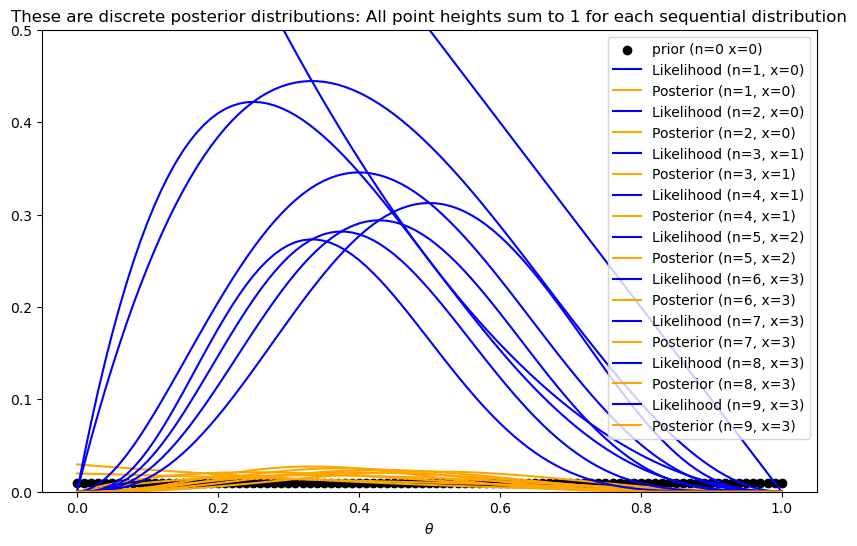

In [11]:
# Question 1: 

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(10,6))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    
    likelihood = stats.binom(n=n,p=parameter_domain).pmf(x)
    posterior = likelihood * prior
    posterior /= np.sum(posterior)

    plt.plot(parameter_domain, likelihood, label = f"Likelihood (n={n}, x={x})", color = 'blue')
    plt.plot(parameter_domain, posterior, label = f"Posterior (n={n}, x={x})", color = 'orange')

plt.xlabel("$\\theta$")
# I'm adding a limit to the y-axis and cutting off some of the data, but I just want to better show that the posterior is being changed.
plt.ylim(0, 0.5)
plt.legend()
plt.show()

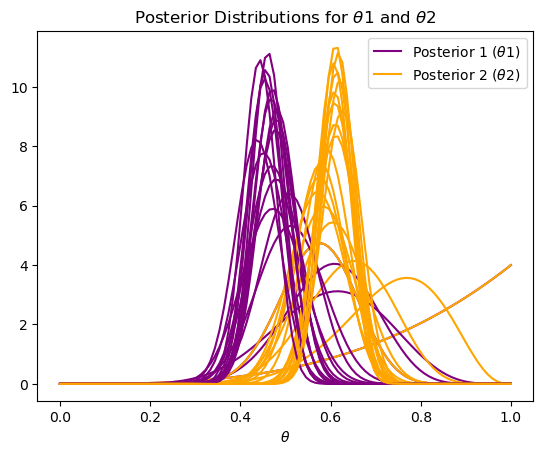

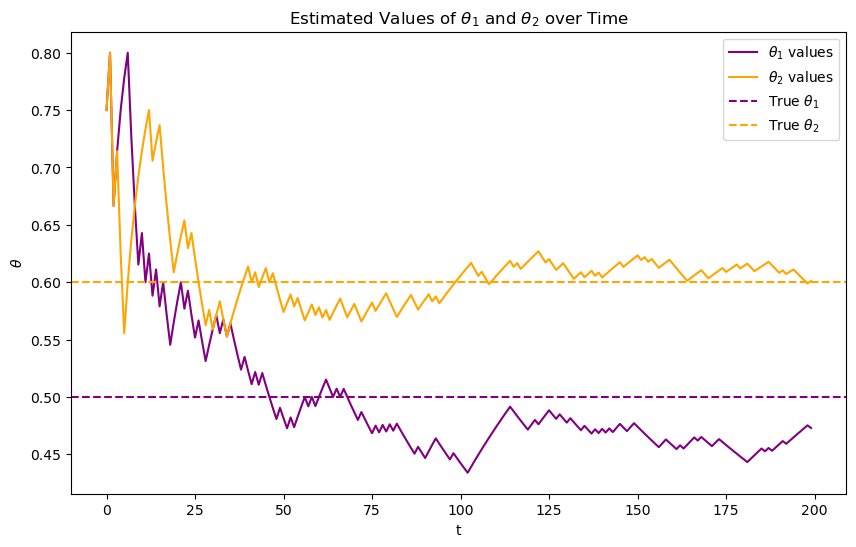

In [23]:
# Question 2: 

# 1.) p(θj|xj^(t), nj^(t)) follows a Beta distribution with parameters α' = x + α and B' = n - x + B.
# 2-5.)

from scipy.stats import beta

# Giving values to parameters alpha, beta, and theta for both Beta distributions: 
alpha1, beta1, theta1 = 3, 1, 0.5  
alpha2, beta2, theta2 = 3, 1, 0.6

# Initialize xj^(0) = nj^(0) = 0
x1_t, n1_t = 0, 0
x2_t, n2_t = 0, 0
parameter_domain = np.linspace(0, 1, 100)

# Track theta values over time, helpful for visualization later
posterior1_over_time = []
posterior2_over_time = []
theta1_values = []
theta2_values = []

# np.random.seed(2)
m = 200
for t in range(m):
    # Based on expectation of Beta distribution (with parameters from part 1):
    theta1_mean = (x1_t + alpha1)/(n1_t + alpha1 + beta1)
    theta2_mean = (x2_t + alpha2)/(n2_t + alpha2 + beta2)

    flip1 = np.random.rand() 
    if flip1 < theta1:
        x1_t += 1
    n1_t += 1

    flip2 = np.random.rand() 
    if flip2 < theta2:
        x2_t += 1
    n2_t += 1
    
    posterior1 = stats.beta.pdf(parameter_domain, x1_t + alpha1, n1_t - x1_t + beta1)
    posterior2 = stats.beta.pdf(parameter_domain, x2_t + alpha2, n2_t - x2_t + beta2)

    posterior1_over_time.append(posterior1)
    posterior2_over_time.append(posterior2)
    theta1_values.append(theta1_mean)
    theta2_values.append(theta2_mean)
    
    # Since m needed to be somewhat large so that theta_hat could converge to theta_true, we are plotting every 10th posterior 
    # to avoid a graph that's overcrowded with too many posterior distributions.
    if t % 10 == 0:
        plt.plot(parameter_domain, posterior1, color='purple')
        plt.plot(parameter_domain, posterior2, color='orange')
        
plt.title("Posterior Distributions for $\\theta$1 and $\\theta$2")
plt.xlabel("$\\theta$")
plt.legend(["Posterior 1 ($\\theta$1)", "Posterior 2 ($\\theta$2)"])
plt.show()

# Visualization of algorithm learning process 
plt.figure(figsize=(10,6))
plt.plot(range(m), theta1_values, label="$\\theta_1$ values", color='purple')
plt.plot(range(m), theta2_values, label="$\\theta_2$ values", color='orange')
plt.axhline(y=theta1, color='purple', linestyle='--', label="True $\\theta_1$")
plt.axhline(y=theta2, color='orange', linestyle='--', label="True $\\theta_2$")
plt.title("Estimated Values of $\\theta_1$ and $\\theta_2$ over Time")
plt.xlabel("t")
plt.ylabel("$\\theta$")
plt.legend()
plt.show()


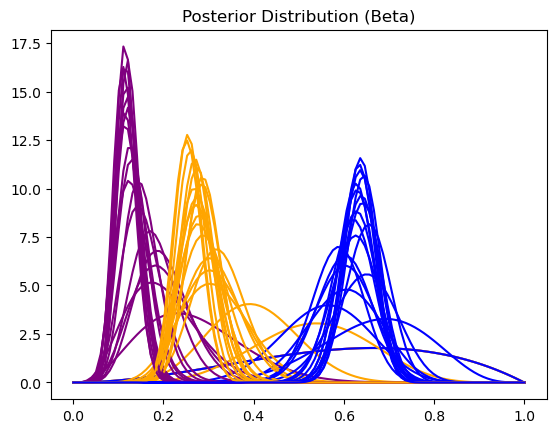

Estimated success probabilities with Beta-Binomial: θ1= 0.115 , θ2= 0.255 , θ3= 0.63


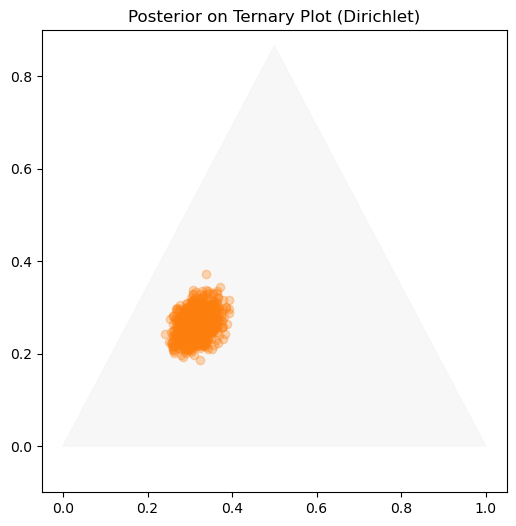

Estimated success probabilities with Dirichlet-Multinomial: θ1= 0.16 , θ2= 0.305 , θ3= 0.535


In [24]:
# Question 3: 

#!pip install python-ternary
import ternary
from scipy.stats import dirichlet

# Setting up 3 entities: since they have Binary outcomes (ex: success/failure), I will assign a success probability to each one.
# Shared data between 2 analyses:
theta1 = 0.1
theta2 = 0.3
theta3 = 0.6
probabilities = [theta1, theta2, theta3]
m = 200

# Analysis using a Beta-Binomial model (entities are independent)
alpha, beta = 3, 1

x1_t, n1_t = 0, 0
x2_t, n2_t = 0, 0
x3_t, n3_t = 0, 0
parameter_domain = np.linspace(0, 1, 100)

for t in range(m):
    flip1 = np.random.rand() 
    if flip1 < theta1:
        x1_t += 1
    n1_t += 1

    flip2 = np.random.rand()
    if flip2 < theta2:
        x2_t += 1
    n2_t += 1

    flip3 = np.random.rand() 
    if flip3 < theta3:
        x3_t += 1
    n3_t += 1

    posterior1 = stats.beta(a = x1_t + alpha, b = n1_t - x1_t + beta)
    posterior2 = stats.beta(a = x2_t + alpha, b = n2_t - x2_t + beta)
    posterior3 = stats.beta(a = x3_t + alpha, b = n3_t - x3_t + beta)

    if t % 10 == 0:
        plt.plot(parameter_domain, posterior1.pdf(parameter_domain), color = 'purple')
        plt.plot(parameter_domain, posterior2.pdf(parameter_domain), color = 'orange')
        plt.plot(parameter_domain, posterior3.pdf(parameter_domain), color = 'blue') 
plt.title("Posterior Distribution (Beta)")
plt.show()

print("Estimated success probabilities with Beta-Binomial:","θ1=", x1_t/n1_t, ", θ2=", x2_t/n2_t, ", θ3=", x3_t/n3_t)

# Analysis using a Dirichlet-Multinomial model (entities are dependent)
multinom_sample = np.random.multinomial(m, probabilities)
entities = ['θ1', 'θ2', 'θ3']
sample_thetas = [i / m for i in multinom_sample]

alpha_prior = np.array([1.1, 1.1, 1.1])  
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

alpha_posterior = alpha_prior + multinom_sample
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
posterior_sample = dirichlet_posterior.rvs(1000)

fig, tax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
tax = ternary.TernaryAxesSubplot(ax=tax)
tax.set_title('Posterior on Ternary Plot (Dirichlet)')

tax.scatter(posterior_sample, alpha=0.3)
tax.show()

print("Estimated success probabilities with Dirichlet-Multinomial:","θ1=", sample_thetas[0], ", θ2=", sample_thetas[1], ", θ3=", sample_thetas[2])



In [ ]:
# Question 3 (discussion): 
# Both the Beta-Binomial and Dirichlet-Multinomial approaches have their unique strengths based on the qualities of the methods. 
# However, the Bayesian multi-armed bandit procedure is likely more appropriate when dealing with independent instances, such as 
# with the Beta-Binomial method. This is better seen when we apply the two methods to a context, such as betting/gambling odds. 
# Say we are looking at a situation related to sports betting; more specifically, looking at the shot success rate of two 
# basketball players. The Beta-Binomial approach would be suitable here because the performance/success of the two 
# players can be regarded as independent from one another. In this context, exploration would mean betting on new players that 
# you don't have as much information about, while exploitation would be consistently betting on the most successful player to 
# try to maximum your return. Using the Bayesian multi-armed bandit (BMAB) method, we can compare the success rates between 
# independent players. 
# Conversely, if we instead wanted to spend our money on gambling games such as roulette, this would require us to use a 
# Dirichlet-multinomial model. This is because the success rate of black and red are dependent, as one increases, the other will 
# decrease. In the context of roulette, exploration would mean trying both colors, which exploitation would mean betting on the 
# color that seems more likely to maximize profit. 
# Based on these two scenarios, we can see that in a Dirichlet-multinomial setting, because the entities depend on each other, 
# we must have a finite/limited number of entities that we can use BMAB to compare to each other. With the roulette example, 
# it's very easy for BMAB to become redunant because after a while, there is not much opportunity for "exploration". 
# On the other hand, a Beta-Binomial setting can essentially have an infinite number of arms, because they are all independent 
# from each other, allowing for many combinations that BMAB can explore. In this way, BMAB can effectively balance exploring new 
# opportunities with exploiting previously successful opportunities to try and maximize rewards. 